In [6]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize)

In [25]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
# Sökvägen till CSV-fil
csv_fil_sökväg = "ethereum_ohlc.csv"

# Läs in CSV-filen
crypto_data = pd.read_csv(csv_fil_sökväg)

# Visa de första raderna av DataFrame
crypto_data.head(10)


,timestamp,open,high,low,close
0,2023-03-28,18499.0,18580.0,17657.0,17828.0
1,2023-04-01,17802.0,19094.0,17694.0,18931.0
2,2023-04-05,18929.0,19438.0,18385.0,19226.0
3,2023-04-09,19240.0,19932.0,19193.0,19385.0
4,2023-04-13,19386.0,20317.0,19204.0,19843.0
5,2023-04-17,19837.0,22054.0,19663.0,21899.0
6,2023-04-21,21918.0,21918.0,19859.0,20032.0
7,2023-04-25,20025.0,20128.0,18690.0,18873.0
8,2023-04-29,18867.0,20240.0,18587.0,19442.0
9,2023-05-03,19425.0,19890.0,18708.0,19275.0


In [7]:
# Skriv ut antalet rader i DataFrame
print("Antal rader i datasetet:", len(crypto_data))

Antal rader i datasetet: 92


In [8]:
crypto_data.columns

Index(['timestamp', 'open', 'high', 'low', 'close'], dtype='object')

Har nu fått ihop en csv fil där även volymer finns med genom att koppla ihop två API:er. Jag har kört koden i filen lag.py.

In [9]:
# Ange sökvägen till din CSV-fil
csv_fil_sökväg = "ethereum_combined_data.csv"

# Läs in CSV-filen
crypto_combined_data = pd.read_csv(csv_fil_sökväg)

# Visa de första raderna av DataFrame
crypto_combined_data.head(10)

,timestamp,open,high,low,close,price,total_volumes
0,2023-04-01,17802.0,19094.0,17694.0,18931.0,18930.591628,1.072042e+11
1,2023-04-05,18929.0,19438.0,18385.0,19226.0,19226.136785,1.189786e+11
2,2023-04-09,19240.0,19932.0,19193.0,19385.0,19384.757943,6.252271e+10
3,2023-04-13,19386.0,20317.0,19204.0,19843.0,19843.200760,1.359117e+11
4,2023-04-17,19837.0,22054.0,19663.0,21899.0,21899.279850,9.178568e+10
5,2023-04-21,21918.0,21918.0,19859.0,20032.0,20031.702008,1.280417e+11
6,2023-04-25,20025.0,20128.0,18690.0,18873.0,18872.758935,9.400288e+10
7,2023-04-29,18867.0,20240.0,18587.0,19442.0,19442.136540,9.086059e+10
8,2023-05-03,19425.0,19890.0,18708.0,19275.0,19274.665982,8.590541e+10
9,2023-05-07,19293.0,20383.0,18920.0,19283.0,19283.475850,1.129963e+11


In [10]:
# Skriv ut antalet rader i DataFrame
print("Antal rader i datasetet:", len(crypto_combined_data))

Antal rader i datasetet: 91


I och med att dom olika API:erna har olika intervall av datum som dom ger värden så blir det bara 91 rader vilket känns som ett för litet dataset. Jag tror att jag väljer att utvärdera varje dataset för sig i stället. Nedan är hur dataset'et med volym såg ut innan det kombinerades med det tidigare dataset:et. Jag väljer att börja med nedan dataset "ethereum_market_data_subset.csv".

In [11]:
# Ange sökvägen till din CSV-fil
csv_fil_sökväg = "ethereum_market_data_subset.csv"

# Läs in CSV-filen
crypto_market_data_subset = pd.read_csv(csv_fil_sökväg)

# Visa de första raderna av DataFrame
crypto_market_data_subset.head(10)

,timestamp,price,total_volumes
0,2023-03-29,18390.541156,9.886756e+10
1,2023-03-30,18663.820127,1.080555e+11
2,2023-03-31,18571.753863,1.135101e+11
3,2023-04-01,18930.591628,1.072042e+11
4,2023-04-02,18920.009442,6.433921e+10
5,2023-04-03,18740.023847,6.963161e+10
6,2023-04-04,18766.025878,1.154859e+11
7,2023-04-05,19226.136785,1.189786e+11
8,2023-04-06,19903.910848,1.206570e+11
9,2023-04-07,19524.350078,9.602805e+10


In [12]:
# Skriv ut antalet rader i DataFrame
print("Antal rader i datasetet:", len(crypto_market_data_subset))

Antal rader i datasetet: 364


In [13]:
import matplotlib.pyplot as plt

In [14]:
crypto_market_data_subset['timestamp'] = pd.to_datetime(crypto_market_data_subset['timestamp'])

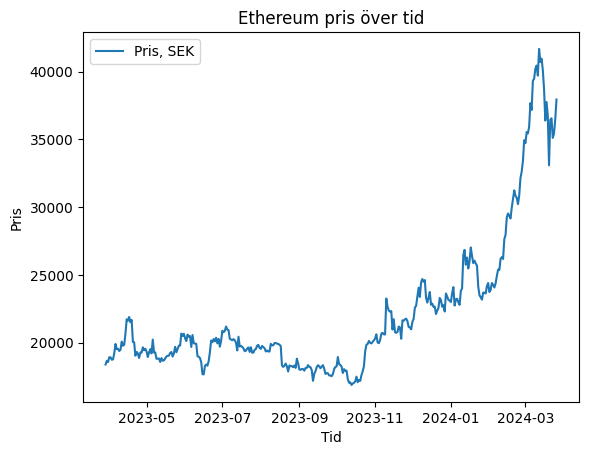

In [16]:
# Plotta datan
plt.plot(crypto_market_data_subset['timestamp'], crypto_market_data_subset['price'], label='Pris, SEK')
plt.xlabel('Tid')
plt.ylabel('Pris')
plt.title('Ethereum pris över tid')
plt.legend()
plt.show()

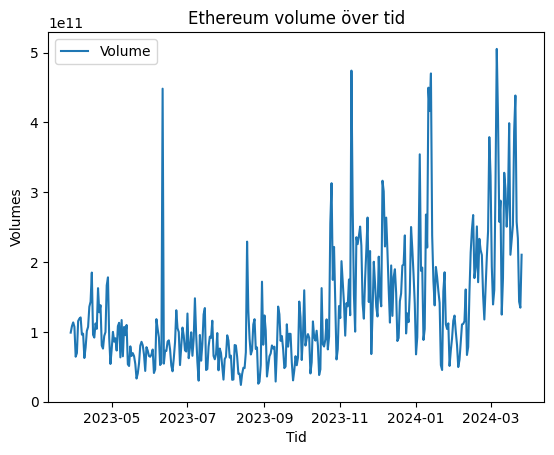

In [17]:
# Plotta datan
plt.plot(crypto_market_data_subset['timestamp'], crypto_market_data_subset['total_volumes'], label='Volume')
plt.xlabel('Tid')
plt.ylabel('Volumes')
plt.title('Ethereum volume över tid')
plt.legend()
plt.show()

In [18]:
crypto_market_data_subset.head

<bound method NDFrame.head of      timestamp         price  total_volumes
0   2023-03-29  18390.541156   9.886756e+10
1   2023-03-30  18663.820127   1.080555e+11
2   2023-03-31  18571.753863   1.135101e+11
3   2023-04-01  18930.591628   1.072042e+11
4   2023-04-02  18920.009442   6.433921e+10
..         ...           ...            ...
359 2024-03-22  36564.429860   2.576570e+11
360 2024-03-23  35115.982730   2.340057e+11
361 2024-03-24  35438.091943   1.432448e+11
362 2024-03-25  36477.479721   1.346166e+11
363 2024-03-26  37951.952872   2.104689e+11

[364 rows x 3 columns]>

### Lägger till LAG1-5 för price och sparar ner som en ny CSV-fil

In [20]:


# # # Skapa en kopia av DataFrame
# crypto_copy_price_LAG = crypto_market_data_subset.copy()

# # Beräkna procentuella avkastningar för Lag1 till Lag5
# crypto_copy_price_LAG['Lag1'] = crypto_copy_price_LAG['price'].pct_change(periods=1) * 100
# crypto_copy_price_LAG['Lag2'] = crypto_copy_price_LAG['price'].pct_change(periods=2) * 100
# crypto_copy_price_LAG['Lag3'] = crypto_copy_price_LAG['price'].pct_change(periods=3) * 100
# crypto_copy_price_LAG['Lag4'] = crypto_copy_price_LAG['price'].pct_change(periods=4) * 100
# crypto_copy_price_LAG['Lag5'] = crypto_copy_price_LAG['price'].pct_change(periods=5) * 100

# # Ta bort rader med NaN-värden (eftersom procentuell förändring inte kan beräknas för de första några raderna)
# crypto_copy_price_LAG = crypto_copy_price_LAG.dropna()

# # Spara DataFrame till en ny CSV-fil
# crypto_copy_price_LAG.to_csv('LAG_on_price_crypto_market_data_subset.csv', index=False)



In [22]:
import pandas as pd

# Skapa en kopia av DataFrame
crypto_copy_price_LAG = crypto_market_data_subset.copy()

# Skapa laggade värden för Lag1 till Lag5 med shift
for lag in range(1, 6):
    crypto_copy_price_LAG[f'Lag{lag}'] = crypto_copy_price_LAG['price'].shift(lag)

# Ta bort rader med NaN-värden (eftersom skiftet inte kan beräknas för de första några raderna)
crypto_copy_price_LAG = crypto_copy_price_LAG.dropna()

# Spara DataFrame till en ny CSV-fil
crypto_copy_price_LAG.to_csv('LAG_on_price_crypto_market_data_subset.csv', index=False)


In [23]:
crypto_copy_price_LAG.columns

Index(['timestamp', 'price', 'total_volumes', 'Lag1', 'Lag2', 'Lag3', 'Lag4',
       'Lag5'],
      dtype='object')

In [24]:
crypto_copy_price_LAG.head

<bound method NDFrame.head of      timestamp         price  total_volumes          Lag1          Lag2  \
5   2023-04-03  18740.023847   6.963161e+10  18920.009442  18930.591628   
6   2023-04-04  18766.025878   1.154859e+11  18740.023847  18920.009442   
7   2023-04-05  19226.136785   1.189786e+11  18766.025878  18740.023847   
8   2023-04-06  19903.910848   1.206570e+11  19226.136785  18766.025878   
9   2023-04-07  19524.350078   9.602805e+10  19903.910848  19226.136785   
..         ...           ...            ...           ...           ...   
359 2024-03-22  36564.429860   2.576570e+11  36456.300341  33091.499797   
360 2024-03-23  35115.982730   2.340057e+11  36564.429860  36456.300341   
361 2024-03-24  35438.091943   1.432448e+11  35115.982730  36564.429860   
362 2024-03-25  36477.479721   1.346166e+11  35438.091943  35115.982730   
363 2024-03-26  37951.952872   2.104689e+11  36477.479721  35438.091943   

             Lag3          Lag4          Lag5  
5    18571.753863  18

Compute the correlation matrix using the corr() method for data .corr() frames, which produces a matrix that contains all of the pairwise correlations among the variables

In [25]:
crypto_copy_price_LAG.corr()

/tmp/ipykernel_17687/2139256758.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crypto_copy_price_LAG.corr()


,price,total_volumes,Lag1,Lag2,Lag3,Lag4,Lag5
price,1.000000,0.614682,0.993048,0.987913,0.982781,0.975159,0.967102
total_volumes,0.614682,1.000000,0.604231,0.594230,0.580481,0.577379,0.569286
Lag1,0.993048,0.604231,1.000000,0.992976,0.987889,0.982696,0.974606
Lag2,0.987913,0.594230,0.992976,1.000000,0.992878,0.987719,0.982346
Lag3,0.982781,0.580481,0.987889,0.992878,1.000000,0.992758,0.987594
Lag4,0.975159,0.577379,0.982696,0.987719,0.992758,1.000000,0.992757
Lag5,0.967102,0.569286,0.974606,0.982346,0.987594,0.992757,1.000000


In [133]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


## För att få en mer överskådlig matris görs en plott med färger, se nedan.

/tmp/ipykernel_17687/43768710.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(crypto_copy_price_LAG.corr(), annot=True, cmap='YlGn', fmt=".2f")


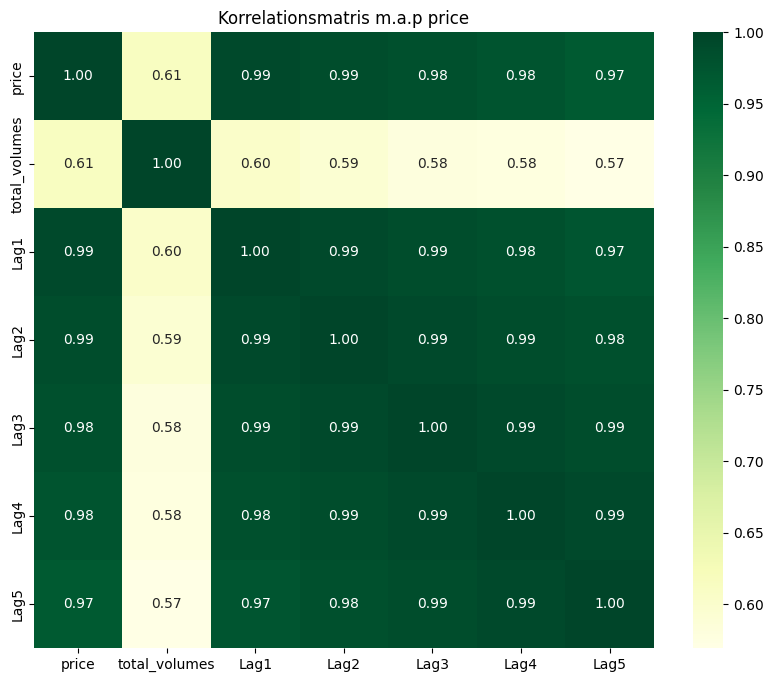

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Skapa en heatmap med korrelationsvärdena
plt.figure(figsize=(10, 8))
sns.heatmap(crypto_copy_price_LAG.corr(), annot=True, cmap='YlGn', fmt=".2f")
plt.title('Korrelationsmatris m.a.p price')
plt.show()


### Gör nu samma sak med Volume. Skapar LAG1-5 värden i en sparad kopia.

In [116]:
## Detta görs på kolumnen total_volumes

# Skapa en kopia av DataFrame
crypto_copy_total_volumes_LAG = crypto_market_data_subset.copy()

# Beräkna procentuella avkastningar för Lag1 till Lag5
crypto_copy_total_volumes_LAG['Lag1'] = crypto_copy_total_volumes_LAG['total_volumes'].pct_change(periods=1) * 100
crypto_copy_total_volumes_LAG['Lag2'] = crypto_copy_total_volumes_LAG['total_volumes'].pct_change(periods=2) * 100
crypto_copy_total_volumes_LAG['Lag3'] = crypto_copy_total_volumes_LAG['total_volumes'].pct_change(periods=3) * 100
crypto_copy_total_volumes_LAG['Lag4'] = crypto_copy_total_volumes_LAG['total_volumes'].pct_change(periods=4) * 100
crypto_copy_total_volumes_LAG['Lag5'] = crypto_copy_total_volumes_LAG['total_volumes'].pct_change(periods=5) * 100

# Ta bort rader med NaN-värden (eftersom procentuell förändring inte kan beräknas för de första några raderna)
crypto_copy_total_volumes_LAG = crypto_copy_total_volumes_LAG.dropna()

# Spara DataFrame till en ny CSV-fil
crypto_copy_total_volumes_LAG.to_csv('LAG_on_total_volumes_crypto_market_data_subset.csv', index=False)



In [117]:
crypto_copy_total_volumes_LAG.columns

Index(['timestamp', 'price', 'total_volumes', 'Lag1', 'Lag2', 'Lag3', 'Lag4',
       'Lag5'],
      dtype='object')

In [118]:
crypto_copy_total_volumes_LAG.head

<bound method NDFrame.head of      timestamp         price  total_volumes       Lag1       Lag2       Lag3   
5   2023-04-03  18740.023847   6.963161e+10   8.225784 -35.047698 -38.656033  \
6   2023-04-04  18766.025878   1.154859e+11  65.852632  79.495311   7.725103   
7   2023-04-05  19226.136785   1.189786e+11   3.024346  70.868590  84.923871   
8   2023-04-06  19903.910848   1.206570e+11   1.410699   4.477710  73.279032   
9   2023-04-07  19524.350078   9.602805e+10 -20.412356 -19.289613 -16.848652   
..         ...           ...            ...        ...        ...        ...   
359 2024-03-22  36564.429860   2.576570e+11 -41.252516 -33.503521   1.853055   
360 2024-03-23  35115.982730   2.340057e+11  -9.179379 -46.645170 -39.607485   
361 2024-03-24  35438.091943   1.432448e+11 -38.785777 -44.404863 -67.339255   
362 2024-03-25  36477.479721   1.346166e+11  -6.023338 -42.472916 -47.753545   
363 2024-03-26  37951.952872   2.104689e+11  56.346832  46.929535 -10.058227   

         

In [119]:
crypto_copy_total_volumes_LAG.corr()

,timestamp,price,total_volumes,Lag1,Lag2,Lag3,Lag4,Lag5
timestamp,1.000000,0.709673,0.538149,-0.015169,0.011379,0.033958,0.046361,0.043521
price,0.709673,1.000000,0.614682,-0.029252,-0.025437,-0.002110,0.017330,-0.003022
total_volumes,0.538149,0.614682,1.000000,0.364147,0.436193,0.482227,0.494964,0.457645
Lag1,-0.015169,-0.029252,0.364147,1.000000,0.743424,0.438730,0.363565,0.356324
Lag2,0.011379,-0.025437,0.436193,0.743424,1.000000,0.695820,0.460523,0.418370
Lag3,0.033958,-0.002110,0.482227,0.438730,0.695820,1.000000,0.668041,0.486326
Lag4,0.046361,0.017330,0.494964,0.363565,0.460523,0.668041,1.000000,0.708892
Lag5,0.043521,-0.003022,0.457645,0.356324,0.418370,0.486326,0.708892,1.000000


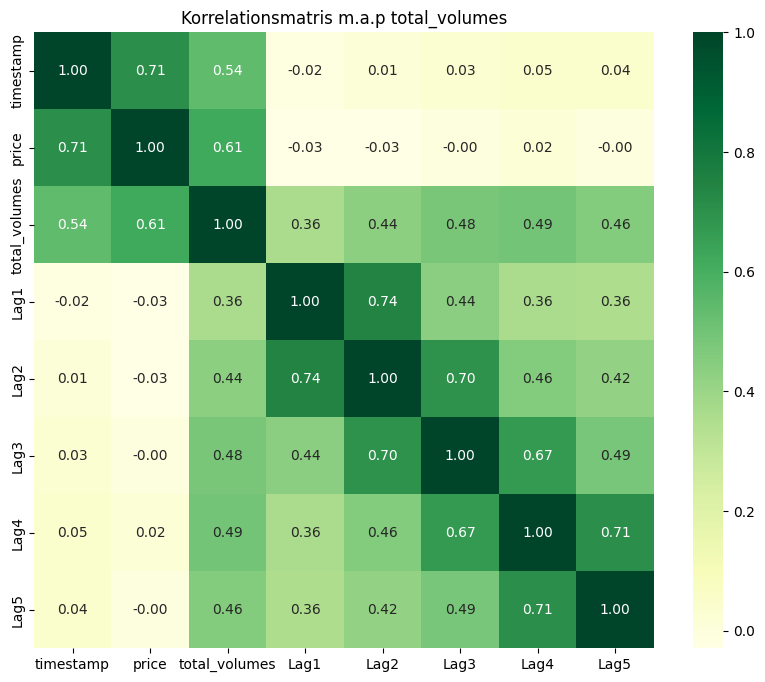

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Skapa en heatmap med korrelationsvärdena
plt.figure(figsize=(10, 8))
sns.heatmap(crypto_copy_total_volumes_LAG.corr(), annot=True, cmap='YlGn', fmt=".2f")
plt.title('Korrelationsmatris m.a.p total_volumes')
plt.show()


Logistic Regression
Fit a logistic regression model in order to predict Direction using Lag1 through Lag5 and Volume. The sm.GLM() function fts gener- sm.GLM() alized linear models, a class of models that includes logistic regression. generalized Alternatively, the function linear model sm.Logit() fts a logistic regression model directly. The syntax of sm.GLM() is similar to that of sm.OLS(), except that
we must pass in the argument family=sm.families.Binomial() in order to
tell statsmodels to run a logistic regression rather than some other type of
generalized linear model

### Lägger först till en kolumn "Directions" som visar om priset har gått upp eller ner sedan tidigare dag. Sparar ner det nya datasetten i en csv "ethereum_market_data_subset_with_direction.csv"

In [6]:
import pandas as pd

# Läs in datasetet
df = pd.read_csv("ethereum_market_data_subset.csv")

# Skapa en kolumn "Direction" baserat på prisförändringen jämfört med föregående dag
df['Direction'] = df['price'].diff().apply(lambda x: 'Up' if x > 0 else 'Down')

# Spara den uppdaterade datan till en ny CSV-fil
df.to_csv("ethereum_market_data_subset_with_direction.csv", index=False)


### Volumes
### Behöver göra ovan på  på csv-filen, som innehåller LAG1-5 för volumes istället. För att få alla värden i samma datafil. Se nedan.

In [1]:
import pandas as pd

# Läs in datasetet
df_volumes = pd.read_csv("LAG_on_total_volumes_crypto_market_data_subset.csv")

# Skapa en kolumn "Direction" baserat på prisförändringen jämfört med föregående dag
df_volumes['Direction'] = df_volumes['price'].diff().apply(lambda x: 'Up' if x > 0 else 'Down')

# Spara den uppdaterade datan till en ny CSV-fil
df_volumes.to_csv("LAG_on_volumes_ethereum_market_data_subset_with_direction.csv", index=False)


In [7]:

# Läser in datasetet
df_with_direction = pd.read_csv("LAG_on_crypto_price_market_subset.csv")

# Skapar en kolumn "Direction" baserat på prisförändringen jämfört med föregående dag
df_with_direction['Direction'] = df_with_direction['Price'].diff().apply(lambda x: 'Up' if x > 0 else 'Down')

# Sparar den uppdaterade datan till en ny CSV-fil
df_with_direction.to_csv("LAG_on_crypto_price_market_subset_with directions.csv", index=False)


In [8]:
df_with_direction.head

<bound method NDFrame.head of             Date  Price     Lag1     Lag2     Lag3     Lag4     Lag5 Direction
0     2018-01-06   8583   8199.0   7959.0   7879.0   7155.0   6345.0      Down
1     2018-01-07   9267   8583.0   8199.0   7959.0   7879.0   7155.0        Up
2     2018-01-08   9723   9267.0   8583.0   8199.0   7959.0   7879.0        Up
3     2018-01-09  11216   9723.0   9267.0   8583.0   8199.0   7959.0        Up
4     2018-01-10  11023  11216.0   9723.0   9267.0   8583.0   8199.0      Down
...          ...    ...      ...      ...      ...      ...      ...       ...
1815  2022-12-27  12867  12836.0  12863.0  12857.0  12744.0  12643.0        Up
1816  2022-12-28  12698  12867.0  12836.0  12863.0  12857.0  12744.0      Down
1817  2022-12-29  12438  12698.0  12867.0  12836.0  12863.0  12857.0      Down
1818  2022-12-30  12567  12438.0  12698.0  12867.0  12836.0  12863.0        Up
1819  2022-12-31  12503  12567.0  12438.0  12698.0  12867.0  12836.0      Down

[1820 rows x 8 column

In [2]:
df_volumes.head

<bound method NDFrame.head of       timestamp         price  total_volumes       Lag1       Lag2       Lag3  \
0    2023-04-03  18740.023847   6.963161e+10   8.225784 -35.047698 -38.656033   
1    2023-04-04  18766.025878   1.154859e+11  65.852632  79.495311   7.725103   
2    2023-04-05  19226.136785   1.189786e+11   3.024346  70.868590  84.923871   
3    2023-04-06  19903.910848   1.206570e+11   1.410699   4.477710  73.279032   
4    2023-04-07  19524.350078   9.602805e+10 -20.412356 -19.289613 -16.848652   
..          ...           ...            ...        ...        ...        ...   
354  2024-03-22  36564.429860   2.576570e+11 -41.252516 -33.503521   1.853055   
355  2024-03-23  35115.982730   2.340057e+11  -9.179379 -46.645170 -39.607485   
356  2024-03-24  35438.091943   1.432448e+11 -38.785777 -44.404863 -67.339255   
357  2024-03-25  36477.479721   1.346166e+11  -6.023338 -42.472916 -47.753545   
358  2024-03-26  37951.952872   2.104689e+11  56.346832  46.929535 -10.058227  

In [9]:
print(df_with_direction.dtypes)

Date          object
Price          int64
Lag1         float64
Lag2         float64
Lag3         float64
Lag4         float64
Lag5         float64
Direction     object
dtype: object


In [3]:
print(df_volumes.dtypes)

timestamp         object
price            float64
total_volumes    float64
Lag1             float64
Lag2             float64
Lag3             float64
Lag4             float64
Lag5             float64
Direction         object
dtype: object


In [10]:
df_with_direction.corr()

/tmp/ipykernel_2117/2989462644.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_with_direction.corr()


,Price,Lag1,Lag2,Lag3,Lag4,Lag5
Price,1.000000,0.997979,0.996210,0.994364,0.992396,0.990308
Lag1,0.997979,1.000000,0.997978,0.996210,0.994362,0.992389
Lag2,0.996210,0.997978,1.000000,0.997978,0.996208,0.994356
Lag3,0.994364,0.996210,0.997978,1.000000,0.997977,0.996203
Lag4,0.992396,0.994362,0.996208,0.997977,1.000000,0.997976
Lag5,0.990308,0.992389,0.994356,0.996203,0.997976,1.000000


In [4]:
df_volumes.corr()

/tmp/ipykernel_2117/435140426.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_volumes.corr()


,price,total_volumes,Lag1,Lag2,Lag3,Lag4,Lag5
price,1.000000,0.614682,-0.029252,-0.025437,-0.002110,0.017330,-0.003022
total_volumes,0.614682,1.000000,0.364147,0.436193,0.482227,0.494964,0.457645
Lag1,-0.029252,0.364147,1.000000,0.743424,0.438730,0.363565,0.356324
Lag2,-0.025437,0.436193,0.743424,1.000000,0.695820,0.460523,0.418370
Lag3,-0.002110,0.482227,0.438730,0.695820,1.000000,0.668041,0.486326
Lag4,0.017330,0.494964,0.363565,0.460523,0.668041,1.000000,0.708892
Lag5,-0.003022,0.457645,0.356324,0.418370,0.486326,0.708892,1.000000


In [11]:
allvars = df_volumes.columns.drop(['timestamp', "Direction"])
print(allvars)
design = MS(allvars)
X = design.fit_transform(df_volumes)
y = df_volumes.Direction == 'Up'
glm = sm.GLM(y,
X,
family=sm.families.Binomial())
results = glm.fit()
summarize(results)

Index(['price', 'total_volumes', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5'], dtype='object')


,coef,std err,z,P>|z|
intercept,-7.920000e-01,5.290000e-01,-1.496,0.135
price,4.031000e-05,3.100000e-05,1.301,0.193
total_volumes,-4.695000e-13,2.330000e-12,-0.202,0.840
Lag1,2.100000e-03,3.000000e-03,0.819,0.413
Lag2,-3.000000e-03,2.000000e-03,-1.224,0.221
Lag3,2.200000e-03,2.000000e-03,1.013,0.311
Lag4,1.700000e-03,2.000000e-03,0.773,0.440
Lag5,-3.000000e-04,2.000000e-03,-0.187,0.852


In [12]:
results.params

intercept       -7.920467e-01
price            4.030858e-05
total_volumes   -4.694820e-13
Lag1             2.109465e-03
Lag2            -2.953270e-03
Lag3             2.241885e-03
Lag4             1.731977e-03
Lag5            -3.231363e-04
dtype: float64

In [13]:
results.pvalues

intercept        0.134632
price            0.193213
total_volumes    0.840028
Lag1             0.412511
Lag2             0.220936
Lag3             0.311069
Lag4             0.439816
Lag5             0.851830
dtype: float64

In [14]:
probs = results.predict()
probs[:10]

array([0.47821594, 0.45820295, 0.4830101 , 0.56345353, 0.49393678,
       0.48235891, 0.45317097, 0.4933694 , 0.46877283, 0.506883  ])

In order to make a prediction as to whether the market will go up or
down on a particular day, we must convert these predicted probabilities
into class labels, Up or Down. The following two commands create a vector
of class predictions based on whether the predicted probability of a market
increase is greater than or less than 0.5.

In [27]:
labels = np.array(['Down']*359)
labels[probs >0.5] = "Up"

IndexError: boolean index did not match indexed array along dimension 0; dimension is 359 but corresponding boolean dimension is 86

The confusion_table() function from the ISLP package summarizes these confusion_
table() predictions, showing how many observations were correctly or incorrectly
classifed. Our function, which is adapted from a similar function in the
module sklearn.metrics, transposes the resulting matrix and includes row
and column labels. The confusion_table() function takes as

In [16]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(labels, df_volumes.Direction)

ValueError: Found input variables with inconsistent numbers of samples: [86, 359]

På ovan matrix. Titta på diagonalvärderna. The diagonal elements of the confusion matrix indicate correct predictions. 91 för korrekta down samt 106 för korrekta up. Summa 91+106=197

In [53]:
(91+106)/359, np.mean(labels == df_volumes.Direction)

(0.5487465181058496, 0.5487465181058496)

It appears that the logistic regression model is working
a little better than random guessing. However, this result is misleading
because we trained and tested the model on the same set of 359 observations. In other words, 100 − 54,9 = 45,1 % is the training error rate. As
we have seen previously, the training error rate is often overly optimistic
— it tends to underestimate the test error rate. In order to better assess
the accuracy of the logistic regression model in this setting, we can ft the
model using part of the data, and then examine how well it predicts the
held out data. This will yield a more realistic error rate, in the sense that in
practice we will be interested in our model’s performance not on the data
that we used to ft the model, but rather on days in the future for which
the market’s movements are unknown.
To implement this strategy, we frst create a Boolean vector corresponding to the observations from ?????????. We then use this vector
to create a held out data set of observations for the rest of the year.

In [18]:
train = (df_volumes.timestamp < "2024-01-01")
df_train = df_volumes.loc[train]
df_test = df_volumes.loc[~train]
df_test.shape

(86, 9)

In [19]:
print(df_train)

      timestamp         price  total_volumes       Lag1        Lag2  \
0    2023-04-03  18740.023847   6.963161e+10   8.225784  -35.047698   
1    2023-04-04  18766.025878   1.154859e+11  65.852632   79.495311   
2    2023-04-05  19226.136785   1.189786e+11   3.024346   70.868590   
3    2023-04-06  19903.910848   1.206570e+11   1.410699    4.477710   
4    2023-04-07  19524.350078   9.602805e+10 -20.412356  -19.289613   
..          ...           ...            ...        ...         ...   
268  2023-12-27  22302.232069   1.565027e+11  37.376119   23.835622   
269  2023-12-28  23630.102191   2.502159e+11  59.879664  119.636478   
270  2023-12-29  23411.330499   2.190165e+11 -12.468995   39.944277   
271  2023-12-30  23162.552604   1.826705e+11 -16.595099  -26.994852   
272  2023-12-31  23110.353590   1.399734e+11 -23.373853  -36.090038   

          Lag3        Lag4        Lag5 Direction  
0   -38.656033  -35.559409  -29.570820      Down  
1     7.725103    1.740584    6.876416       

In [20]:
print(df_test)

      timestamp         price  total_volumes        Lag1        Lag2  \
273  2024-01-01  23000.842874   6.774475e+10  -51.601693  -62.914242   
274  2024-01-02  23657.195265   9.234409e+10   36.311805  -34.027394   
275  2024-01-03  24100.634463   2.102008e+11  127.627775  210.283529   
276  2024-01-04  22742.024635   3.543386e+11   68.571480  283.715510   
277  2024-01-05  23198.216221   1.873558e+11  -47.125191  -10.868152   
..          ...           ...            ...         ...         ...   
354  2024-03-22  36564.429860   2.576570e+11  -41.252516  -33.503521   
355  2024-03-23  35115.982730   2.340057e+11   -9.179379  -46.645170   
356  2024-03-24  35438.091943   1.432448e+11  -38.785777  -44.404863   
357  2024-03-25  36477.479721   1.346166e+11   -6.023338  -42.472916   
358  2024-03-26  37951.952872   2.104689e+11   56.346832   46.929535   

           Lag3        Lag4       Lag5 Direction  
273  -69.068660  -72.925487 -56.713360      Down  
274  -49.447734  -57.836932 -63.0

In [21]:
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train,
X_train,
family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)

In [22]:
D = df_volumes.Direction
L_train, L_test = D.loc[train], D.loc[~train]

In [23]:
print(D)

0      Down
1        Up
2        Up
3        Up
4      Down
       ... 
354      Up
355    Down
356      Up
357      Up
358      Up
Name: Direction, Length: 359, dtype: object


In [28]:
labels = np.array(['Down']*86)
labels[probs >0.5] = 'Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,2,3
Up,35,46


In [29]:
np.mean(labels == L_test), np.mean(labels != L_test)

(0.5581395348837209, 0.4418604651162791)

The test accuracy is about 55,8 % while the test error rate is about 44,2%

Tar nu och väljer ut enbart dom variablerna som  hade någon inverkan på "prediction". I mitt fall var det Lag2. Kanske det kan förbättra modellen.

In [30]:
model = MS(['Lag2']).fit(df_volumes)
X = model.transform(df_volumes)
X_train, X_test = X.loc[train], X.loc[~train]
glm_train = sm.GLM(y_train,
X_train,
family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)
labels = np.array(['Down']*86)
labels[probs >0.5] = 'Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,7,17
Up,30,32


Evaluate the overall accuracy as well as the accuracy within the
days when logistic regression predicts an increase

In [31]:
(32+7)/86,32/(32+30)

(0.45348837209302323, 0.5161290322580645)

<span style="color:red; font-size:x-large">The down below are done on kolumn Price</span>

### Behöver även göra ovan på kolumn price. Dvs lägga till en column för directions av price på csv-filen, som innehåller LAG1-5 för price. För att få alla värden i samma datafil.

In [27]:
import pandas as pd

# Läs in datasetet
df_price = pd.read_csv("LAG_on_price_crypto_market_data_subset.csv")

# Skapa en kolumn "Direction" baserat på prisförändringen jämfört med föregående dag
df_price['Direction'] = df_price['price'].diff().apply(lambda x: 'Up' if x > 0 else 'Down')

# Spara den uppdaterade datan till en ny CSV-fil
df_price.to_csv("LAG_on_price_with_direction.csv", index=False)


In [30]:
df_price.columns

Index(['timestamp', 'price', 'total_volumes', 'Lag1', 'Lag2', 'Lag3', 'Lag4',
       'Lag5', 'Direction'],
      dtype='object')

In [28]:
df_price.head

<bound method NDFrame.head of       timestamp         price  total_volumes          Lag1          Lag2  \
0    2023-04-03  18740.023847   6.963161e+10  18920.009442  18930.591628   
1    2023-04-04  18766.025878   1.154859e+11  18740.023847  18920.009442   
2    2023-04-05  19226.136785   1.189786e+11  18766.025878  18740.023847   
3    2023-04-06  19903.910848   1.206570e+11  19226.136785  18766.025878   
4    2023-04-07  19524.350078   9.602805e+10  19903.910848  19226.136785   
..          ...           ...            ...           ...           ...   
354  2024-03-22  36564.429860   2.576570e+11  36456.300341  33091.499797   
355  2024-03-23  35115.982730   2.340057e+11  36564.429860  36456.300341   
356  2024-03-24  35438.091943   1.432448e+11  35115.982730  36564.429860   
357  2024-03-25  36477.479721   1.346166e+11  35438.091943  35115.982730   
358  2024-03-26  37951.952872   2.104689e+11  36477.479721  35438.091943   

             Lag3          Lag4          Lag5 Direction  

In [24]:
allvars = df_price.columns.drop(['timestamp', "Direction"])
design = MS(allvars)
X = design.fit_transform(df_price)
y = df_price.Direction == 'Up'
glm = sm.GLM(y,
X,
family=sm.families.Binomial())
results = glm.fit()
summarize(results)

/mnt/c/Users/aras/python_iths/iths_2023_sep_dec/aras_venv/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/mnt/c/Users/aras/python_iths/iths_2023_sep_dec/aras_venv/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/mnt/c/Users/aras/python_iths/iths_2023_sep_dec/aras_venv/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/mnt/c/Users/aras/python_iths/iths_2023_sep_dec/aras_venv/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, paramet

,coef,std err,z,P>|z|
intercept,-2.271670e+01,460000.000000,-0.000049,1.000
price,1.700000e-03,25.620000,0.000065,1.000
total_volumes,-2.741000e-10,0.000001,-0.000000,1.000
Lag1,7.453060e+02,434000.000000,0.002000,0.999
Lag2,2.000300e+00,12100.000000,0.000000,1.000
Lag3,5.228100e+00,87000.000000,0.000060,1.000
Lag4,-2.516500e+00,31100.000000,-0.000081,1.000
Lag5,2.236500e+00,33800.000000,0.000066,1.000


Ett p-värde på 1 indikerar  att det inte finns tillräckligt med bevis för att förkasta nollhypotesen, vilket vanligtvis betyder att det inte finns något verkligt samband eller skillnad. 